In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

In [40]:
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


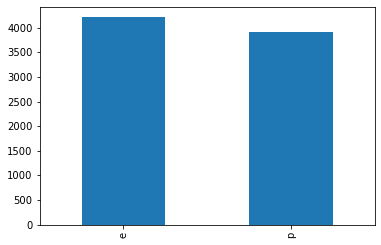

In [41]:
df['class'].value_counts().sort_index().plot.bar()
plt.show()

In [43]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for y in df.columns:
    df[y] = labelencoder.fit_transform(df[y])

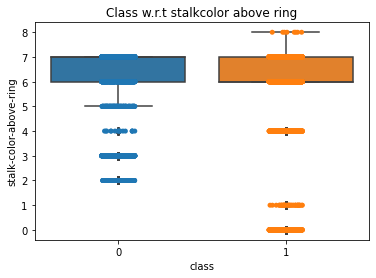

In [44]:
ax = sb.boxplot(x='class', y='stalk-color-above-ring', 
                data=df)
ax = sb.stripplot(x="class", y='stalk-color-above-ring',
                   data=df, jitter=True,
                   edgecolor="gray")
plt.title("Class w.r.t stalkcolor above ring",fontsize=12)
plt.show()

In [45]:
corr = df.corr()

In [46]:
from sklearn.model_selection import train_test_split

xtr, xts, ytr, yts = train_test_split(df[df.columns[1:24]], df['class'], test_size=0.2)
print(len(xtr),len(xts),len(ytr),len(yts))

6499 1625 6499 1625


In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
model = RandomForestClassifier()
model.fit(xtr, ytr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
model.predict(xts)

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [ ]:
df['prediksi'] = model.predict(df[df.columns[1:24]])

In [28]:
col = df.columns.tolist()
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,prediksi
0,1,5,2,4,1,6,1,0,1,4,...,7,7,0,2,1,4,2,3,5,1
1,0,5,2,9,1,0,1,0,0,4,...,7,7,0,2,1,4,3,2,1,0
2,0,0,2,8,1,3,1,0,0,5,...,7,7,0,2,1,4,3,2,3,0
3,1,5,3,8,1,6,1,0,1,5,...,7,7,0,2,1,4,2,3,5,1
4,0,5,2,3,0,5,1,1,0,4,...,7,7,0,2,1,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,5,5,0,1,1,4,0,1,2,0
8120,0,5,2,4,0,5,0,0,0,11,...,5,5,0,0,1,4,0,4,2,0
8121,0,2,2,4,0,5,0,0,0,5,...,5,5,0,1,1,4,0,1,2,0
8122,1,3,3,4,0,8,1,0,1,0,...,7,7,0,2,1,0,7,4,2,1


In [29]:
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, 
    f1_score, balanced_accuracy_score, precision_recall_fscore_support)

In [32]:
print('akurasi = ', accuracy_score(df['class'], df['prediksi']))
print('Error Rate', round(1 - accuracy_score(df['class'], df['prediksi'])))

print('recall(+) = ', recall_score(df['class'], df['prediksi'], pos_label=1))
print('recall(-) = ', recall_score(df['class'], df['prediksi'], pos_label=0))

print('Precision(+)', precision_score(df['class'], df['prediksi'],pos_label=1))
print('Precision(-)', precision_score(df['class'], df['prediksi'],pos_label=0))

print('bACC = ',balanced_accuracy_score(df['class'], df['prediksi']))

print('f1_score(+) = ', f1_score(df['class'], df['prediksi'], pos_label=1))
print('f1_score(-) = ', f1_score(df['class'], df['prediksi'], pos_label=0))

akurasi =  1.0
Error Rate 0.0
recall(+) =  1.0
recall(-) =  1.0
Precision(+) 1.0
Precision(-) 1.0
bACC =  1.0
f1_score(+) =  1.0
f1_score(-) =  1.0


In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

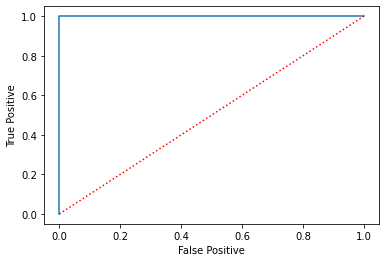

In [34]:
fpr, tpr, thres = roc_curve(yts, model.predict_proba(xts)[:,1])

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'r:')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.show()

In [35]:
roc_auc_score(yts, model.predict(xts))

1.0